<a href="https://colab.research.google.com/github/gabrielheifel/AED-1/blob/master/trab_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Especificações*

Primeiro foi realizado o filtro de Notch tentando encontrar as frequencias corretas para cortar da imagem e encontrando o raio mais adequado. Então foi aplicado o filtro na imagem transformada de fourier e depois retornando para a forma original da imagem.

Foi usado o borramento gaussiano para todas as partes de borramento e o detector de bordas laplaciano.

# Exercício 1

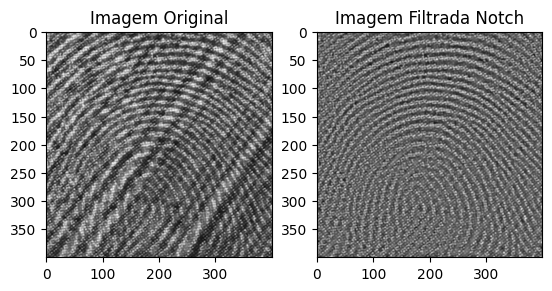

In [169]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('originalprint.png', 0)

# Transformada de Fourier 2D
imagem_fft = np.fft.fft2(imagem)
imagem_fft_shifted = np.fft.fftshift(imagem_fft)

# Dimensões da imagem
rows, cols = imagem.shape

# Coordenadas do centro da imagem
cy, cx = rows // 2, cols // 2

# Coordenadas da frequência a ser eliminada
notch_x, notch_y = 100, 150

# Raio do filtro notch
radius = 22

# Filtro notch
filtro_notch = np.ones((rows, cols), dtype=np.uint8)
filtro_notch[cy - radius:cy + radius, cx - radius:cx + radius] = 0
filtro_notch[cy - radius:cy + radius, cx - radius:cx + radius] = 0

# Aplica o filtro notch multiplicando-o com a imagem na frequência
imagem_filtrada_fft = imagem_fft_shifted * filtro_notch

# Transformada Inversa de Fourier
imagem_filtrada = np.fft.ifft2(np.fft.ifftshift(imagem_filtrada_fft)).real

# Normaliza a imagem resultante
imagem_filtrada = cv2.normalize(imagem_filtrada, None, 0, 255, cv2.NORM_MINMAX)

# plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(122)
plt.imshow(imagem_filtrada, cmap='gray')
plt.title('Imagem Filtrada Notch')

plt.show()

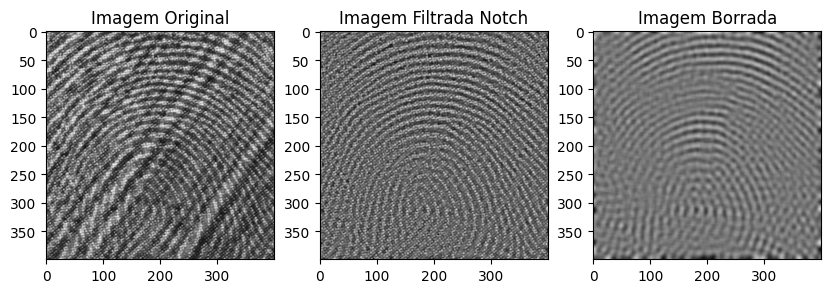

In [136]:
# Borramento usando um kernel gaussiano
imagem_borrada = cv2.GaussianBlur(imagem_filtrada, (15, 15), 5)
imagem_borrada = np.absolute(imagem_borrada)

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(132)
plt.imshow(imagem_filtrada, cmap='gray')
plt.title('Imagem Filtrada Notch')

plt.subplot(133)
plt.imshow(imagem_borrada, cmap='gray')
plt.title('Imagem Borrada')

plt.show()

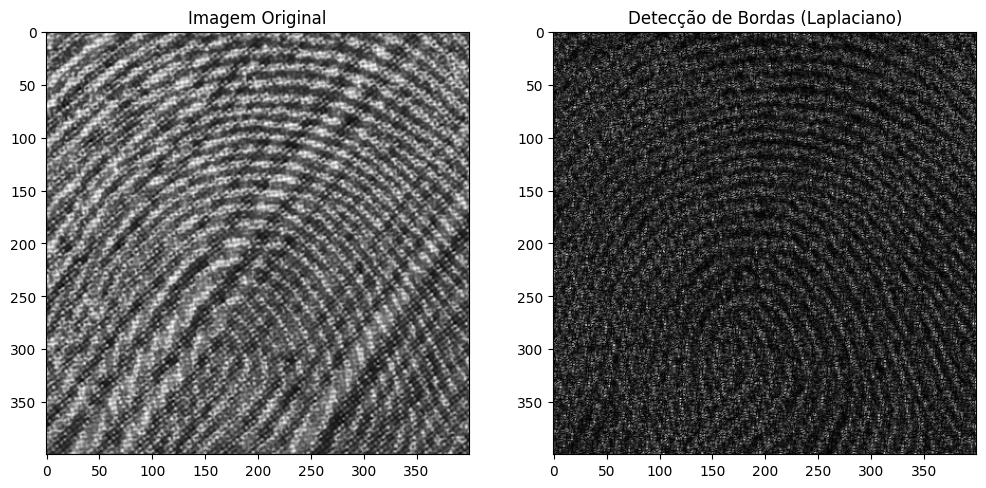

In [171]:
# Aplica o operador Laplaciano para detecção de bordas
imagem_bordas = cv2.Laplacian(imagem_filtrada, cv2.CV_64F)

# Valores negativos para que as bordas fiquem visíveis
imagem_bordas = np.uint8(np.absolute(imagem_bordas))

# Exiba a imagem original e a imagem com as bordas realçadas
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(122)
plt.imshow(imagem_bordas, cmap='gray')
plt.title('Detecção de Bordas (Laplaciano)')

plt.show()


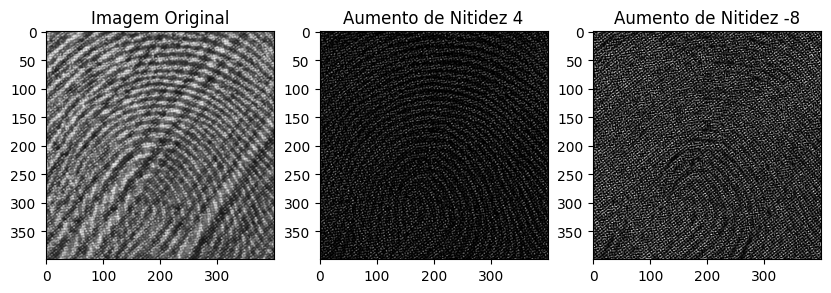

In [153]:
# Aumento de nitidez usando um filtro Laplaciano
filtro_laplaciano = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]], dtype=np.float32)
imagem_agucada = cv2.filter2D(imagem_filtrada, -1, filtro_laplaciano)

filtro_laplaciano2 = np.array([[1, 1, 1],
                              [1, -8, 1],
                              [1, 1, 1]], dtype=np.float32)
imagem_agucada2 = cv2.filter2D(imagem_filtrada, -1, filtro_laplaciano2)

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(132)
plt.imshow(imagem_agucada, cmap='gray')
plt.title('Aumento de Nitidez 4')

plt.subplot(133)
plt.imshow(imagem_agucada2, cmap='gray')
plt.title('Aumento de Nitidez -8')

plt.show()

# Exercício 2

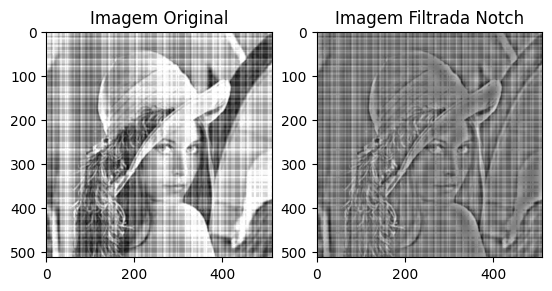

In [179]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imagem = cv2.imread('lena.png', 0)  # Certifique-se de ler em escala de cinza

# Transformada de Fourier 2D
imagem_fft = np.fft.fft2(imagem)
imagem_fft_shifted = np.fft.fftshift(imagem_fft)

# Dimensões da imagem
rows, cols = imagem.shape

# Coordenadas do centro da imagem
cy, cx = rows // 2, cols // 2

# Coordenadas da frequência a ser eliminada (ajuste essas coordenadas conforme necessário)
notch_x, notch_y = 100, 150

# Raio do filtro notch
radius = 10

# Crie um filtro notch
filtro_notch = np.ones((rows, cols), dtype=np.uint8)
filtro_notch[cy - radius:cy + radius, cx - radius:cx + radius] = 0
filtro_notch[cy - radius:cy + radius, cx - radius:cx + radius] = 0

# Aplique o filtro notch multiplicando-o com a imagem na frequência
imagem_filtrada_fft = imagem_fft_shifted * filtro_notch

# Transformada Inversa de Fourier
imagem_filtrada = np.fft.ifft2(np.fft.ifftshift(imagem_filtrada_fft)).real

# Normalizar a imagem resultante
imagem_filtrada = cv2.normalize(imagem_filtrada, None, 0, 255, cv2.NORM_MINMAX)

# Converter para o tipo de dados correto (geralmente uint8)
imagem_filtrada = np.uint8(imagem_filtrada)

# plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(122)
plt.imshow(imagem_filtrada, cmap='gray')
plt.title('Imagem Filtrada Notch')

plt.show()

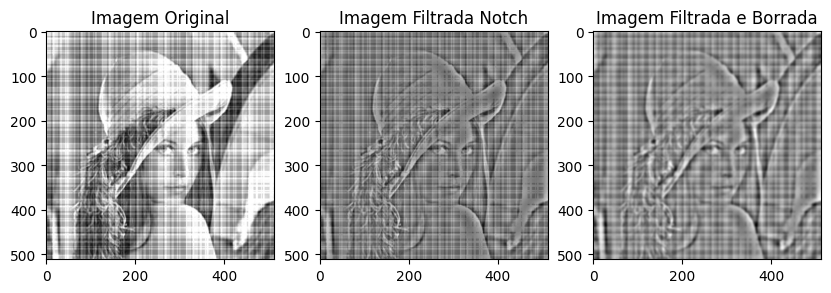

In [180]:
# Borramento usando um kernel gaussiano
imagem_borrada = cv2.GaussianBlur(imagem_filtrada, (15, 15), 2)
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(132)
plt.imshow(imagem_filtrada, cmap='gray')
plt.title('Imagem Filtrada Notch')

plt.subplot(133)
plt.imshow(imagem_borrada, cmap='gray')
plt.title('Imagem Filtrada e Borrada')

plt.show()

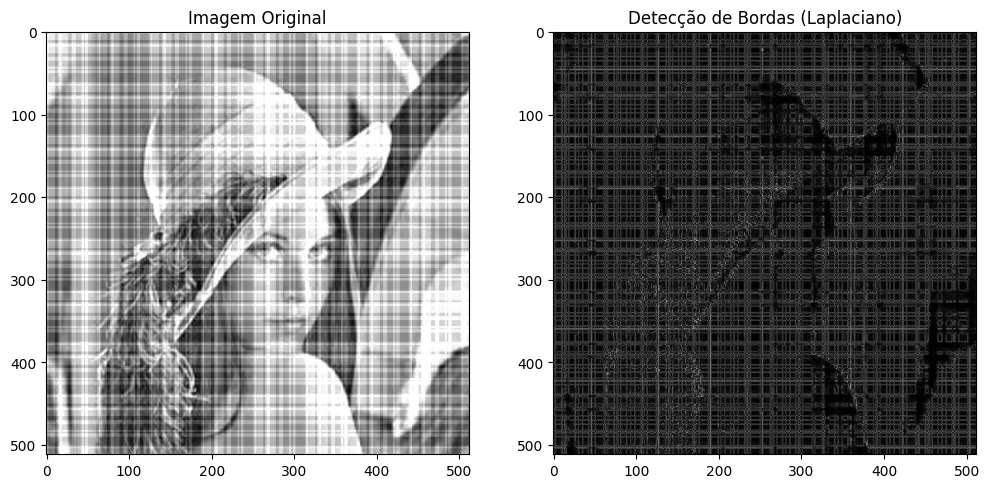

In [181]:
# Aplica o operador Laplaciano para detecção de bordas
imagem_bordas = cv2.Laplacian(imagem_filtrada, cv2.CV_64F)

# Valores negativos para que as bordas fiquem visíveis
imagem_bordas = np.uint8(np.absolute(imagem_bordas))

# Exiba a imagem original e a imagem com as bordas realçadas
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(122)
plt.imshow(imagem_bordas, cmap='gray')
plt.title('Detecção de Bordas (Laplaciano)')

plt.show()


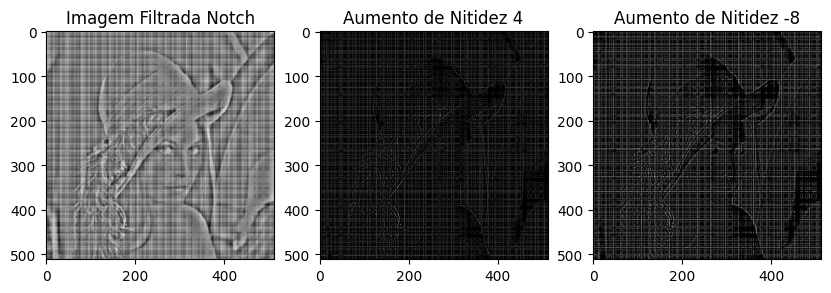

In [182]:
# Aumento de nitidez usando um filtro Laplaciano
filtro_laplaciano = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]], dtype=np.float32)
imagem_agucada = cv2.filter2D(imagem_filtrada, -1, filtro_laplaciano)

filtro_laplaciano2 = np.array([[1, 1, 1],
                              [1, -8, 1],
                              [1, 1, 1]], dtype=np.float32)
imagem_agucada2 = cv2.filter2D(imagem_filtrada, -1, filtro_laplaciano2)

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(131)
plt.imshow(imagem_filtrada, cmap='gray')
plt.title('Imagem Filtrada Notch')

plt.subplot(132)
plt.imshow(imagem_agucada, cmap='gray')
plt.title('Aumento de Nitidez 4')

plt.subplot(133)
plt.imshow(imagem_agucada2, cmap='gray')
plt.title('Aumento de Nitidez -8')

plt.show()

# Exercício 3


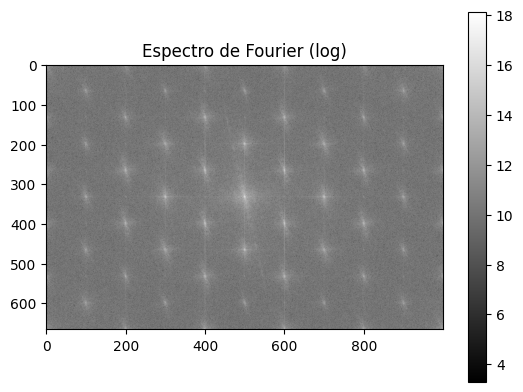

In [174]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagem = cv2.imread('I2Cvt.png', 0)

# Transformada de Fourier 2D
imagem_fft = np.fft.fft2(imagem)
imagem_fft_shifted = np.fft.fftshift(imagem_fft)

# Calcula o módulo do espectro de Fourier
espectro = np.abs(imagem_fft_shifted)

# Exibe o espectro de Fourier para identificar as frequências de ruído
plt.imshow(np.log1p(espectro), cmap='gray')
plt.colorbar()
plt.title('Espectro de Fourier (log)')
plt.show()


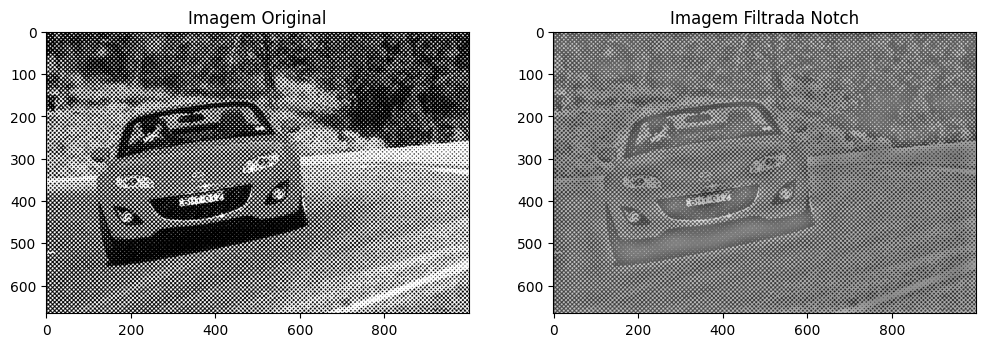

In [175]:
# Dimensões da imagem
rows, cols = imagem.shape

# Coordenadas do centro da imagem
cy, cx = rows // 2, cols // 2

# Coordenadas da frequência a ser eliminada
notch_x, notch_y = 500, 331

# Raio do filtro notch
radius = 10

# Filtro notch
filtro_notch = np.ones((rows, cols), dtype=np.uint8)
filtro_notch[cy - radius:cy + radius, cx - radius:cx + radius] = 0
filtro_notch[cy - radius:cy + radius, cx - radius:cx + radius] = 0

# Filtro notch multiplicando-o com a imagem na frequência
imagem_filtrada_fft = imagem_fft_shifted * filtro_notch

# Transformada Inversa de Fourier
imagem_filtrada = np.fft.ifft2(np.fft.ifftshift(imagem_filtrada_fft)).real

# Normalizar a imagem resultante
imagem_filtrada = cv2.normalize(imagem_filtrada, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(122)
plt.imshow(imagem_filtrada, cmap='gray')
plt.title('Imagem Filtrada Notch')

plt.show()